Необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

Этапы работы:

Получите и загрузите данные.
Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.
Снова загрузите полные данные.
Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
Проверьте данные на наличие пропущенных значений.
a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.
Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
Проверьте данные на наличие выбросов.
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.
*Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
*Попробуйте математически преобразовать признак Age.
Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.
Сформулируйте выводы по проделанной работе.
a) Кратко опишите какие преобразования были сделаны и почему.
b) Сравните метрики моделей из п. 2 и п. 10.
c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?
Для получения зачета по этому домашнему заданию, минимально, должно быть построено две модели, выведена одна метрика для каждой. В данных должны быть обработаны пропуски и категориальные значения.
Результат: применены на практике основные методы разведочного анализа данных (exploratory data analysis, EDA). Проведена оценка качества данных.

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [300]:
df = pd.read_csv('Data/train.csv')

In [301]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [303]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [304]:
first_df = df.copy()

In [305]:
first_df = first_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [306]:
first_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [307]:
first_df.dropna(inplace=True)

In [308]:
first_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


Построим подель и выведим метрики качества.

In [309]:
le = LabelEncoder()
le.fit(first_df['Sex'])
le.classes_

array(['female', 'male'], dtype=object)

In [310]:
first_df['Sex'] = le.transform(first_df['Sex'])

In [311]:
le.fit(first_df['Embarked'])
le.classes_

array(['C', 'Q', 'S'], dtype=object)

In [312]:
first_df['Embarked'] = le.transform(first_df['Embarked'])

In [313]:
first_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [314]:
X = first_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [315]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [316]:
y = first_df['Survived']

In [317]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [318]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [319]:
#Поделим данные на обучающую выборку и тестовую. Указываем в test_size долю датасета, которая пойдет на тестовую выбору
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [320]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [321]:
model.score(X_train, y_train) 

0.8084358523725835

In [322]:
model.score(X_test,y_test)

0.7972027972027972

Точность модели на очищенных данных порядка 80%, не очень хорошо, поэтому переходим ко второй части задания

In [323]:
second_df = df.copy()

Удалим признаки, которые не нужны для построения модели, такие как ФИО, ID или номер билета пассажира никак не повлияют на его выживаемость. 

In [324]:
second_df = second_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [325]:
second_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


Если просто удалим все строки имеющие пустые значения, то потеряем примерно 77% всех данных, поэтому заполните пропуски средним значением, константой, классом, указывающим на то, что значение было пропущено или случайным числом. Для разных признаков используем подходящий метод.

In [326]:
second_df.describe(include = "all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,147,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,B96 B98,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,4,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


In [327]:
second_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Для более детального анализа, создадим новую колонку 'Age_NaN' (бинарный классификатор). Используем метод where(), где прописываем условие: - если значение в колонке 'Age' отсутствует, то присваиваем в колонке 'Age_NaN' - значение 0, если присутствует, то 1.

In [328]:
second_df['Age_NaN'] = np.where(second_df['Age'].isnull(), 0,1)
second_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_NaN
0,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,1


In [329]:
second_df['Age_NaN'].value_counts()

Age_NaN
1    714
0    177
Name: count, dtype: int64

In [330]:
#Выживаемость пассажиров в зависимости от наличия записи о возрасте.
second_df.groupby(['Age_NaN']) ['Survived'].value_counts(normalize=True)

Age_NaN  Survived
0        0           0.706215
         1           0.293785
1        0           0.593838
         1           0.406162
Name: proportion, dtype: float64

Видим: - что, среди пассажиров, у которых значение возраста отсутствовало, были выжившие (около 30%) и погибшие (около 70%).

In [331]:
#Выживаемость пассажиров  в зависимости от наличия записи о возрасте и класса.
second_df.groupby(['Age_NaN','Pclass']) ['Survived'].value_counts(normalize=True)

Age_NaN  Pclass  Survived
0        1       0           0.533333
                 1           0.466667
         2       0           0.636364
                 1           0.363636
         3       0           0.750000
                 1           0.250000
1        1       1           0.655914
                 0           0.344086
         2       0           0.520231
                 1           0.479769
         3       0           0.760563
                 1           0.239437
Name: proportion, dtype: float64

In [332]:
#зависимость от наличия записи о возрасте и класса
pd.crosstab(second_df['Pclass'], second_df['Age_NaN'])


Age_NaN,0,1
Pclass,,
1,30,186
2,11,173
3,136,355


В первом классе запись отсутствует у 30 пассажиров. Из 30 пассажиров выжило - 46%(14 пассажиров), погибло - 53%(16 пассажиров). Всего пассажиров было в первом классе - 216 (в данном наборе данных).

Во втором классе запись отсутствует у 11 пассажиров. Из 11 пассажиров выжило - 36%(4 пассажира), погибло - 63% (7 пассажиров). Всего пассажиров было во втором классе - 184 (в данном наборе данных).

В третьем классе запись отсутствует у 136 пассажиров. Из 136 пассажиров выжило - 25% (34 пассажира), погибло - 75% (102 пассажира). Всего пассажиров было в третьем классе - 491 (в данном наборе данных).

In [333]:
#Выживаемость пассажиров в зависимости от наличия записи о возрасте и пола.
second_df.groupby(['Age_NaN','Sex']) ['Survived'].value_counts(normalize=True)

Age_NaN  Sex     Survived
0        female  1           0.679245
                 0           0.320755
         male    0           0.870968
                 1           0.129032
1        female  1           0.754789
                 0           0.245211
         male    0           0.794702
                 1           0.205298
Name: proportion, dtype: float64

In [334]:
pd.crosstab(second_df['Sex'], second_df['Age_NaN'])

Age_NaN,0,1
Sex,,
female,53,261
male,124,453


У 53 женщин нет записи о возрасте. Из 53 женщин выжило 68% (36 женщин), погибло 32% (17 женщин). Всего женщин было - 314 (в данном наборе данных).
У 124 мужчин нет записи о возрасте. Из 124 мужчин выжило 13% (16 мужчин), погибло 87% (108 мужчин). Всего мужчин было - 577 (в данном наборе данных)
Пассажиров было много в 3 классе и много погибло. Пассажиры - мужчины, у которых был более дешевый билет и более низкий класс - имели меньше шансов выжить. Пропущенные значения заполнить средним значением

In [335]:
second_df['Age'].fillna(second_df['Age'].mean(), inplace = True)

In [336]:
second_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
 9   Age_NaN   891 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(3)
memory usage: 66.3+ KB


In [337]:
second_df.groupby(second_df['Cabin'].isnull()).count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_NaN
Cabin,,,,,,,,,,
False,204,204,204,204,204,204,204,204,202,204
True,687,687,687,687,687,687,687,0,687,687


Те пассажиры у кого запись отсутствует - выжили около 30%.
Создать новую колонку 'Cabin_available' (бинарный классификатор).Используем метод where(), где прописываем условие: - Если значение в колонке 'Cabin' отсутствует, то присваиваем в колонке 'Cabin_available' - значение 0, если присутствует, то 1.

In [338]:
second_df['Cabin_available'] = np.where(second_df['Cabin'].isnull(), 0,1)
second_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_NaN,Cabin_available
0,0,3,male,22.0,1,0,7.2500,NaN,S,1,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,1,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,1,0


In [339]:
#Выживаемость пассажиров в зависимости от наличия записи о каюте:
second_df.groupby(['Cabin_available']) ['Survived'].value_counts(normalize=True)

Cabin_available  Survived
0                0           0.700146
                 1           0.299854
1                1           0.666667
                 0           0.333333
Name: proportion, dtype: float64

In [340]:
#Теперь столбец 'Cabin' удаляем
second_df.drop(['Cabin'], axis = 1, inplace = True)
second_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NaN,Cabin_available
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,1
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,1,1
4,0,3,male,35.0,0,0,8.0500,S,1,0


In [341]:
second_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    object 
 3   Age              891 non-null    float64
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Fare             891 non-null    float64
 7   Embarked         889 non-null    object 
 8   Age_NaN          891 non-null    int32  
 9   Cabin_available  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(2)
memory usage: 62.8+ KB


В колонке порт посадки на борт ('Embarked') не указано два значения. Это категориальный признак.

Решение: Заменить пропущенные значения по частоте. Заменить отсутствующее значение значением, которым чаще всего встречается в конкретном столбце.

In [342]:
second_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [343]:
#заменим пропущенное значение 
second_df['Embarked'].replace(np.nan, 'S', inplace = True)
second_df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [344]:
#Получаем датасет без пропущенных значений
second_df.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Age_NaN            0
Cabin_available    0
dtype: int64

Проверим данные на наличие выбросов

In [345]:
second_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Стоимость билета равная 0 и 512 тысячам, выглядят подозрительно, проверим

In [346]:
second_df['Fare'].where(second_df['Fare'] < 8).value_counts()

Fare
7.8958    38
7.7500    34
7.9250    18
7.7750    16
7.2292    15
0.0000    15
7.2500    13
7.8542    13
7.2250    12
7.0500     7
7.7958     6
7.1250     4
7.7333     4
7.5500     4
7.6500     4
7.8792     4
7.4958     3
6.9750     2
6.4958     2
7.7375     2
7.0542     2
7.8292     2
6.7500     2
7.5208     1
6.4375     1
6.9500     1
6.4500     1
7.8875     1
7.7417     1
7.6292     1
7.7250     1
7.0458     1
7.8750     1
6.8583     1
7.7292     1
4.0125     1
6.2375     1
7.8000     1
7.7875     1
7.3125     1
7.1417     1
5.0000     1
Name: count, dtype: int64

In [347]:
second_df['Fare'].where(second_df['Fare'] > 120).value_counts()

Fare
263.0000    4
151.5500    4
227.5250    4
512.3292    3
153.4625    3
135.6333    3
211.3375    3
146.5208    2
247.5208    2
262.3750    2
164.8667    2
134.5000    2
133.6500    2
211.5000    1
221.7792    1
Name: count, dtype: int64

Получается, 15 билетов с нулевой стоимостью(что не может быть), а три самых дорогих билета(президентский люкс?) 
Посмотрим из какого класса были данные пассажиры

In [348]:
second_df[['Fare', 'Pclass']].where(second_df['Fare'] < 4).value_counts()

Fare  Pclass
0.0   2.0       6
      1.0       5
      3.0       4
Name: count, dtype: int64

In [349]:
second_df[['Fare', 'Pclass']].where(second_df['Fare'] > 120).value_counts()

Fare      Pclass
151.5500  1.0       4
227.5250  1.0       4
263.0000  1.0       4
135.6333  1.0       3
153.4625  1.0       3
211.3375  1.0       3
512.3292  1.0       3
133.6500  1.0       2
134.5000  1.0       2
146.5208  1.0       2
164.8667  1.0       2
247.5208  1.0       2
262.3750  1.0       2
211.5000  1.0       1
221.7792  1.0       1
Name: count, dtype: int64

Видим, что нулевая стоимость билета в разных классах, а экстримально большая стоимость только в одном, поэтому заменим значения нулевой стоимости на среднее значения для данного класса, а экстримально большую просто удалим. 

In [350]:
second_df = second_df[second_df.Fare != second_df['Fare'].max()]

In [351]:
second_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         888 non-null    int64  
 1   Pclass           888 non-null    int64  
 2   Sex              888 non-null    object 
 3   Age              888 non-null    float64
 4   SibSp            888 non-null    int64  
 5   Parch            888 non-null    int64  
 6   Fare             888 non-null    float64
 7   Embarked         888 non-null    object 
 8   Age_NaN          888 non-null    int32  
 9   Cabin_available  888 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(2)
memory usage: 69.4+ KB


In [352]:
second_df.loc[second_df['Fare'] == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NaN,Cabin_available
179,0,3,male,36.000000,0,0,0.0,S,1,0
263,0,1,male,40.000000,0,0,0.0,S,1,1
271,1,3,male,25.000000,0,0,0.0,S,1,0
277,0,2,male,29.699118,0,0,0.0,S,0,0
302,0,3,male,19.000000,0,0,0.0,S,1,0
413,0,2,male,29.699118,0,0,0.0,S,0,0
466,0,2,male,29.699118,0,0,0.0,S,0,0
481,0,2,male,29.699118,0,0,0.0,S,0,0
597,0,3,male,49.000000,0,0,0.0,S,1,0
633,0,1,male,29.699118,0,0,0.0,S,0,0


In [353]:
a = second_df.loc[second_df['Pclass'] == 1, 'Fare'].mean()
a

78.12406056338027

In [354]:
b = second_df.loc[second_df['Pclass'] == 2, 'Fare'].mean()
b

20.662183152173913

In [355]:
c = second_df.loc[second_df['Pclass'] == 3, 'Fare'].mean()
c

13.675550101832993

In [356]:
second_df['Fare'] = np.where((second_df['Pclass'] == 1) & (second_df['Fare'] == 0), a, second_df['Fare'])

In [357]:
second_df[['Fare', 'Pclass']].where(second_df['Fare'] < 4).value_counts()

Fare  Pclass
0.0   2.0       6
      3.0       4
Name: count, dtype: int64

In [358]:
second_df['Fare'] = np.where((second_df['Pclass'] == 2) & (second_df['Fare'] == 0), b, second_df['Fare'])
second_df['Fare'] = np.where((second_df['Pclass'] == 3) & (second_df['Fare'] == 0), c, second_df['Fare'])

In [359]:
second_df[['Fare', 'Pclass']].where(second_df['Fare'] < 4).value_counts()

Series([], Name: count, dtype: int64)

In [360]:
second_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NaN,Cabin_available
0,0,3,male,22.000000,1,0,7.2500,S,1,0
1,1,1,female,38.000000,1,0,71.2833,C,1,1
2,1,3,female,26.000000,0,0,7.9250,S,1,0
3,1,1,female,35.000000,1,0,53.1000,S,1,1
4,0,3,male,35.000000,0,0,8.0500,S,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,0
887,1,1,female,19.000000,0,0,30.0000,S,1,1
888,0,3,female,29.699118,1,2,23.4500,S,0,0
889,1,1,male,26.000000,0,0,30.0000,C,1,1


Посмотрим на график выживаемости пассажиров в зависимости от класса и возраста

In [361]:
Age1 = second_df.loc[second_df['Survived']==1]
Age2 = second_df.loc[second_df['Survived']==0]
Age1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NaN,Cabin_available
1,1,1,female,38.0,1,0,71.2833,C,1,1
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,1,1
8,1,3,female,27.0,0,2,11.1333,S,1,0
9,1,2,female,14.0,1,0,30.0708,C,1,0
...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,1,0
879,1,1,female,56.0,0,1,83.1583,C,1,1
880,1,2,female,25.0,0,1,26.0000,S,1,0
887,1,1,female,19.0,0,0,30.0000,S,1,1


Построим гистограмму, где посмотрим, сколько людей разного возраста погибло и выжило и есть ли в этом связь. 

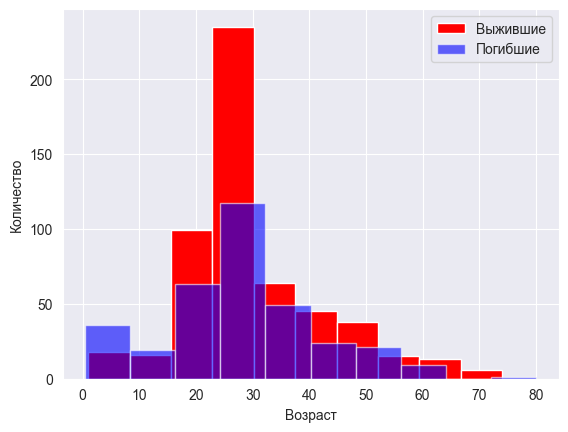

In [362]:
fig, ax = plt.subplots(1, 1)
plt.hist(Age2['Age'], color='red')
plt.hist(Age1['Age'], alpha=0.6, color='blue')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество')
ax.legend(('Выжившие', 'Погибшие'), loc='upper right')
plt.show() 

Из графика видно, что детей до 10 лет спасали активнее, чем стариков, которым повезло меньше, в целом же, максимальное количество выживших и погибших находится в средней возрастной категории. 

In [363]:
sex1 = second_df.loc[(second_df['Sex']=='female') & (second_df['Survived'] == 1)]
sex2 = second_df.loc[(second_df['Sex']=='male') & (second_df['Survived'] == 1)]
sex1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NaN,Cabin_available
1,1,1,female,38.0,1,0,71.2833,C,1,1
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,1,1
8,1,3,female,27.0,0,2,11.1333,S,1,0
9,1,2,female,14.0,1,0,30.0708,C,1,0
...,...,...,...,...,...,...,...,...,...,...
874,1,2,female,28.0,1,0,24.0000,C,1,0
875,1,3,female,15.0,0,0,7.2250,C,1,0
879,1,1,female,56.0,0,1,83.1583,C,1,1
880,1,2,female,25.0,0,1,26.0000,S,1,0


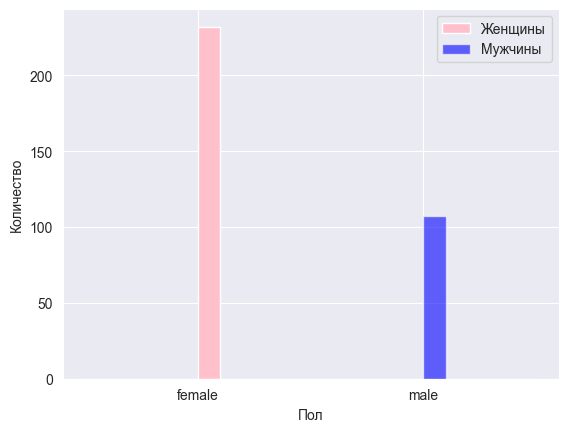

In [364]:
fig, ax = plt.subplots()
plt.hist(sex1['Sex'], color='pink')
plt.hist(sex2['Sex'], alpha=0.6, color='blue')
ax.set_xlabel('Пол')
ax.set_ylabel('Количество')
ax.legend(('Женщины', 'Мужчины'), loc='upper right')
plt.show() 

Женщин выжило в 2 раза больше чем мужчин

In [365]:
# округлим значения возраста до целых чисел
second_df['Age'] = second_df.Age.round()

In [366]:
second_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NaN,Cabin_available
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,1
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,1,1
4,0,3,male,35.0,0,0,8.0500,S,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,0
887,1,1,female,19.0,0,0,30.0000,S,1,1
888,0,3,female,30.0,1,2,23.4500,S,0,0
889,1,1,male,26.0,0,0,30.0000,C,1,1


Обучим модель на новых данных и сравним значения

In [367]:
X1 = second_df.drop(['Survived'], axis=1)

In [368]:
X1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NaN,Cabin_available
0,3,male,22.0,1,0,7.2500,S,1,0
1,1,female,38.0,1,0,71.2833,C,1,1
2,3,female,26.0,0,0,7.9250,S,1,0
3,1,female,35.0,1,0,53.1000,S,1,1
4,3,male,35.0,0,0,8.0500,S,1,0


In [369]:
le = LabelEncoder()
le.fit(X1['Sex'])
le.classes_

array(['female', 'male'], dtype=object)

In [370]:
X1['Sex'] = le.transform(X1['Sex'])

In [371]:
le = LabelEncoder()
le.fit(X1['Embarked'])
le.classes_

array(['C', 'Q', 'S'], dtype=object)

In [372]:
X1['Embarked'] = le.transform(X1['Embarked'])

In [373]:
y1 = second_df['Survived']

In [374]:
model1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [375]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [376]:
model1.fit(X1_train, y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [377]:
model1.score(X1_train, y1_train)

0.7929577464788733

In [378]:
model1.score(X1_test, y1_test)

0.8426966292134831

После преобразования данных, качество модели улучшилось на 4%, для преобразования данных, ввели дополнительные критерии для возраста и каюты, т.к. эти данные были не полные, так же, возраст дополнили среднем значением, а порт отправления наиболее частым. Категориальные переменные привели к числовому виду, а возраст к целочисленному значению. Столбцы же не несущие никакие критерии, либо имеющих недостаточное количество данных были удалены. 
Т.к. датасет имел небольшое количество значений, подготовка данных не привела к значительному приросту показателей, но на больших объемах данных, это различия были бы более заметны. 